# 1. Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
#from sklearn.naive_bayes import MultinomialNB,ComplementNB
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,FunctionTransformer

from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# 2. Importar set de entrenamiento

In [2]:
data_train = pd.read_json('train.json')
data_train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
type(data_train['ingredients'][0])

list

Primero se necesita una columna con un string de ingredientes.

In [4]:
data_train['ingr_str'] = data_train['ingredients'].apply(lambda x: ' '.join(x))
data_train.head()

,cuisine,id,ingredients,ingr_str
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce black olives grape tomatoes ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour ground pepper salt tomatoes ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs pepper salt mayonaise cooking oil green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper shallots cornflour cayenne pepper...


In [5]:
data_train['cant_ingr'] = data_train['ingredients'].str.len()
data_train.head()

,cuisine,id,ingredients,ingr_str,cant_ingr
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce black olives grape tomatoes ga...,9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour ground pepper salt tomatoes ground...,11
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs pepper salt mayonaise cooking oil green c...,12
3,indian,22213,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt,4
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper shallots cornflour cayenne pepper...,20


Por ser pocos datos, tomo como un filtro de outliers el sacar los que tengan más de 6 palabras.

In [6]:
data_train.shape

(39774, 5)

In [7]:
#data_train.drop(index=data_train.loc[data_train['ingr_len']>6].index,inplace=True)

In [8]:
data_train.drop(index=data_train.loc[(data_train['cant_ingr']==1)|(data_train['cant_ingr']>30)].index,inplace=True)

In [9]:
X = data_train['ingr_str']
y = data_train['cuisine']

# 3. Split en Train y Test

Para armar y validar el modelo dividimos los datos del archivo 'train.json' en train y test. Luego de haber probado y elegido el mejor modelo posible, se realizarán predicciones sobre un nuevo set de datos del archivo 'test.json', del cual no se conocen las etiquetas.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [11]:
X.shape,y.shape

((39712,), (39712,))

In [12]:
X_train.shape,y_train.shape

((29784,), (29784,))

In [13]:
X_test.shape,y_test.shape

((9928,), (9928,))

In [14]:
# pipeline = Pipeline([
#    ('vect', CountVectorizer(analyzer='word', binary=True, decode_error='strict',
#                             encoding='utf-8',lowercase=True, max_df=1.0,
#                             max_features=5000, min_df=1,ngram_range=(1, 1), stop_words='english',
#                             strip_accents=None, token_pattern='(?u)\\b\\w\\w\\w+\\b')),
#     ('transformer',FunctionTransformer(lambda x: x.astype('float'), validate=False)),
#     ('scaler',StandardScaler()),
#     ('clf', KNeighborsClassifier()), 
# ])

In [15]:
# k_range = list(range(1,20))

In [16]:
# parameters = {
# #     'vect__max_features': [5000,10000,15000],
# #     'vect__ngram_range': ((1, 1), (1, 2)),
# #     'vect__stop_words': ['english', None],
# #     'vect__binary': [True,False],
# #     'vect__token_pattern' : [r'(?u)\b\w\w\w+\b'],
#     'scaler__with_mean' : [False],
#     'clf__n_neighbors': list(range(17,24)),
#     'clf__weights' : ['uniform','distance']
# }

In [17]:
# grid_search = GridSearchCV (pipeline, parameters, n_jobs = 2 , verbose = 2 , cv=3)
#random_search = RandomizedSearchCV(pipeline, parameters, n_iter=20, cv=3, scoring='accuracy',verbose=2,n_jobs=2)

In [18]:
# print("Performing random search...") 
# random_search.fit(X_train, y_train)

# print("Best score: %0.3f" % random_search.best_score_) 
# print("Best parameters set:" )
# best_parameters = random_search.best_estimator_.get_params()
# for param_name in sorted (parameters . keys()): 
#                     print("\t %s: %r" % (param_name, best_parameters[param_name])) 

In [19]:
# print("Performing grid search...") 
# grid_search.fit(X_train, y_train)

# print("Best score: %0.3f" % grid_search.best_score_) 
# print("Best parameters set:" )
# best_parameters = grid_search.best_estimator_.get_params()
# for param_name in sorted (parameters . keys()): 
#                     print("\t %s: %r" % (param_name, best_parameters[param_name])) 

In [20]:
# #vec = CountVectorizer(stop_words='english')
# vec = CountVectorizer(binary=True,lowercase=True)

# X_train = vec.fit_transform(X_train)
# X_test = vec.transform(X_test)

# KNN

In [21]:
vec = CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                      encoding='utf-8',lowercase=True, max_df=1.0,
                      max_features=5000, min_df=1,ngram_range=(1, 1), stop_words='english',
                      strip_accents=None, token_pattern='(?u)\\b\\w\\w\\w+\\b')

X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

In [22]:
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train.astype('float64'))
X_test = scaler.transform(X_test.astype('float64'))

In [23]:
X_train.shape,y_train.shape

((29784, 2774), (29784,))

In [24]:
# feat_selector = SelectPercentile(f_classif, percentile=10)
# feat_selector = feat_selector.fit(X_train,y_train)
# X_train_new = feat_selector.transform(X_train)
# X_train_new.shape

In [25]:
X_test.shape,y_test.shape

((9928, 2774), (9928,))

In [26]:
# X_test_new = feat_selector.transform(X_test)
# X_test_new.shape

In [27]:
def crossval_knn(X_train,y_train,k_range=(1,5),weights='uniform'):
    kf = KFold(n_splits=5, shuffle=True, random_state=12)
    scores=[]
    for i in range(k_range[0],k_range[1]+1):
        print("training model with {} neighbours.".format(i))
        model = KNeighborsClassifier(n_neighbors=i,n_jobs=2,weights=weights)
        cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
        dict_row_score = {'score_medio':np.mean(cv_scores),\
                      'score_std':np.std(cv_scores), 'n_neighbours':i}
        scores.append(dict_row_score)
    
    df = pd.DataFrame(scores)
    df['lim_sup']=df['score_medio']+df['score_std']
    df['lim_inf']=df['score_medio']-df['score_std']
    
    return df

In [28]:
df_scores1 = crossval_knn(X_train,y_train,k_range=(1,30),weights='uniform')
df_scores1

training model with 1 neighbours.
training model with 2 neighbours.
training model with 3 neighbours.
training model with 4 neighbours.
training model with 5 neighbours.
training model with 6 neighbours.
training model with 7 neighbours.
training model with 8 neighbours.
training model with 9 neighbours.
training model with 10 neighbours.
training model with 11 neighbours.
training model with 12 neighbours.
training model with 13 neighbours.
training model with 14 neighbours.
training model with 15 neighbours.
training model with 16 neighbours.
training model with 17 neighbours.
training model with 18 neighbours.
training model with 19 neighbours.
training model with 20 neighbours.
training model with 21 neighbours.
training model with 22 neighbours.
training model with 23 neighbours.
training model with 24 neighbours.
training model with 25 neighbours.
training model with 26 neighbours.
training model with 27 neighbours.
training model with 28 neighbours.
training model with 29 neighb

,n_neighbours,score_medio,score_std,lim_sup,lim_inf
0,1,0.553485,0.005945,0.559430,0.547540
1,2,0.528371,0.005971,0.534342,0.522400
2,3,0.550564,0.004425,0.554989,0.546139
3,4,0.570642,0.004316,0.574958,0.566326
4,5,0.585146,0.005302,0.590448,0.579844
5,6,0.595655,0.004113,0.599768,0.591542
6,7,0.601565,0.001357,0.602921,0.600208
7,8,0.608850,0.002631,0.611482,0.606219
8,9,0.613887,0.003037,0.616924,0.610849
9,10,0.619829,0.001466,0.621296,0.618363


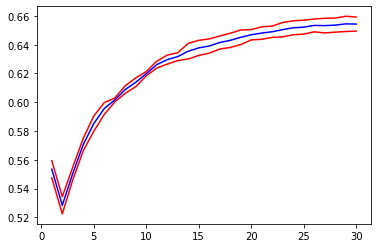

In [29]:
plt.plot(df_scores1['n_neighbours'],df_scores1['lim_inf'],color='r')
plt.plot(df_scores1['n_neighbours'],df_scores1['score_medio'],color='b')
plt.plot(df_scores1['n_neighbours'],df_scores1['lim_sup'],color='r')
#plt.ylim(0.4, 0.52);

In [30]:
best_k1 = df_scores1.loc[df_scores1.score_medio == df_scores1.score_medio.max(),['n_neighbours','score_medio']]
best_k1

,n_neighbours,score_medio
28,29,0.654479


In [31]:
df_scores2 = crossval_knn(X_train,y_train,k_range=(1,30),weights='distance')
df_scores2

training model with 1 neighbours.
training model with 2 neighbours.
training model with 3 neighbours.
training model with 4 neighbours.
training model with 5 neighbours.
training model with 6 neighbours.
training model with 7 neighbours.
training model with 8 neighbours.
training model with 9 neighbours.
training model with 10 neighbours.
training model with 11 neighbours.
training model with 12 neighbours.
training model with 13 neighbours.
training model with 14 neighbours.
training model with 15 neighbours.
training model with 16 neighbours.
training model with 17 neighbours.
training model with 18 neighbours.
training model with 19 neighbours.
training model with 20 neighbours.
training model with 21 neighbours.
training model with 22 neighbours.
training model with 23 neighbours.
training model with 24 neighbours.
training model with 25 neighbours.
training model with 26 neighbours.
training model with 27 neighbours.
training model with 28 neighbours.
training model with 29 neighb

,n_neighbours,score_medio,score_std,lim_sup,lim_inf
0,1,0.553485,0.005945,0.559430,0.547540
1,2,0.553418,0.005842,0.559260,0.547576
2,3,0.572824,0.002804,0.575628,0.570020
3,4,0.585616,0.002872,0.588488,0.582745
4,5,0.597737,0.001714,0.599451,0.596023
5,6,0.607742,0.002199,0.609941,0.605544
6,7,0.613551,0.000767,0.614318,0.612784
7,8,0.620333,0.001527,0.621860,0.618806
8,9,0.625470,0.001250,0.626720,0.624220
9,10,0.630103,0.000755,0.630858,0.629349


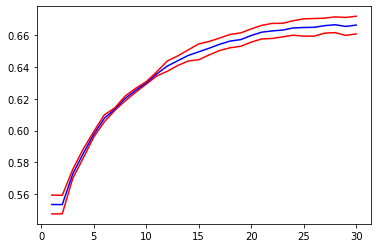

In [32]:
plt.plot(df_scores2['n_neighbours'],df_scores2['lim_inf'],color='r')
plt.plot(df_scores2['n_neighbours'],df_scores2['score_medio'],color='b')
plt.plot(df_scores2['n_neighbours'],df_scores2['lim_sup'],color='r')
#plt.ylim(0.4, 0.52);

In [33]:
best_k2 = df_scores2.loc[df_scores2.score_medio == df_scores2.score_medio.max(),['n_neighbours','score_medio']]
best_k2

,n_neighbours,score_medio
27,28,0.666734


In [34]:
best_k2['n_neighbours'].values[0]

28

In [35]:
model = KNeighborsClassifier(n_neighbors=best_k2['n_neighbours'].values[0],weights='distance')
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='distance')

In [36]:
X_train.shape,y_train.shape

((29784, 2774), (29784,))

In [37]:
X_test.shape,y_test.shape

((9928, 2774), (9928,))

In [38]:
y_pred = model.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred)

0.6687147461724415

In [40]:
y_pred_train = model.predict(X_train)
accuracy_score(y_train,y_pred_train)

0.9997649744829439

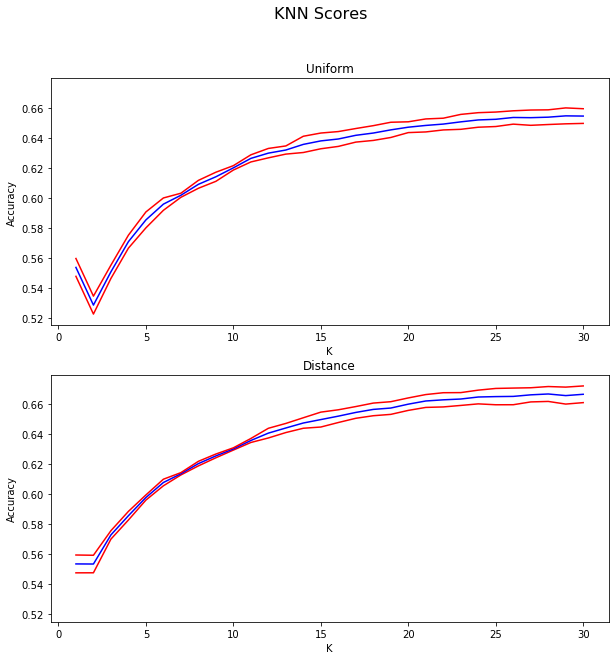

In [41]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True)

fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle('KNN Scores', fontsize=16)

ax1.set_title('Uniform')
ax1.set_xlabel('K')
ax1.set_ylabel('Accuracy')
ax1.plot(df_scores1['n_neighbours'],df_scores1['lim_inf'],color='r')
ax1.plot(df_scores1['n_neighbours'],df_scores1['score_medio'],color='b')
ax1.plot(df_scores1['n_neighbours'],df_scores1['lim_sup'],color='r')

ax2.set_title('Distance')
ax2.set_xlabel('K')
ax2.set_ylabel('Accuracy')
ax2.plot(df_scores2['n_neighbours'],df_scores2['lim_inf'],color='r')
ax2.plot(df_scores2['n_neighbours'],df_scores2['score_medio'],color='b')
ax2.plot(df_scores2['n_neighbours'],df_scores2['lim_sup'],color='r')

plt.savefig('Images/KNN_Scores.png')


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   brazilian       0.47      0.42      0.45       116
     british       0.49      0.16      0.25       201
cajun_creole       0.74      0.40      0.52       386
     chinese       0.69      0.71      0.70       668
    filipino       0.65      0.42      0.51       188
      french       0.55      0.50      0.52       661
       greek       0.70      0.48      0.57       293
      indian       0.73      0.78      0.76       748
       irish       0.45      0.41      0.43       167
     italian       0.64      0.86      0.74      1959
    jamaican       0.82      0.61      0.70       131
    japanese       0.75      0.63      0.68       355
      korean       0.70      0.64      0.67       207
     mexican       0.73      0.87      0.79      1606
    moroccan       0.75      0.37      0.49       205
     russian       0.71      0.26      0.38       122
 southern_us       0.61      0.75      0.67      1079
     spanish       0.66    

El modelo con KNN no es muy bueno.